# OPENING FILE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'ENB2012_data.xlsx'

try:
    # Load the Excel file
    excel_data = pd.ExcelFile(file_path)
    excel_data.sheet_names  # Display the sheet names to confirm the file opened successfully
except Exception as e:
    e  # Display the error if the file cannot be opened

In [2]:
df = pd.read_excel(file_path)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# OBSERVATION- NO NULL VALUES

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459372e-17  3.636925e-1

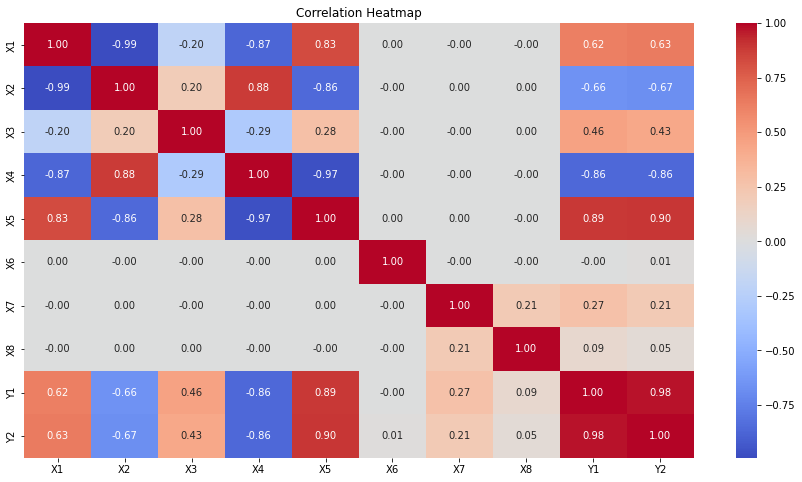

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

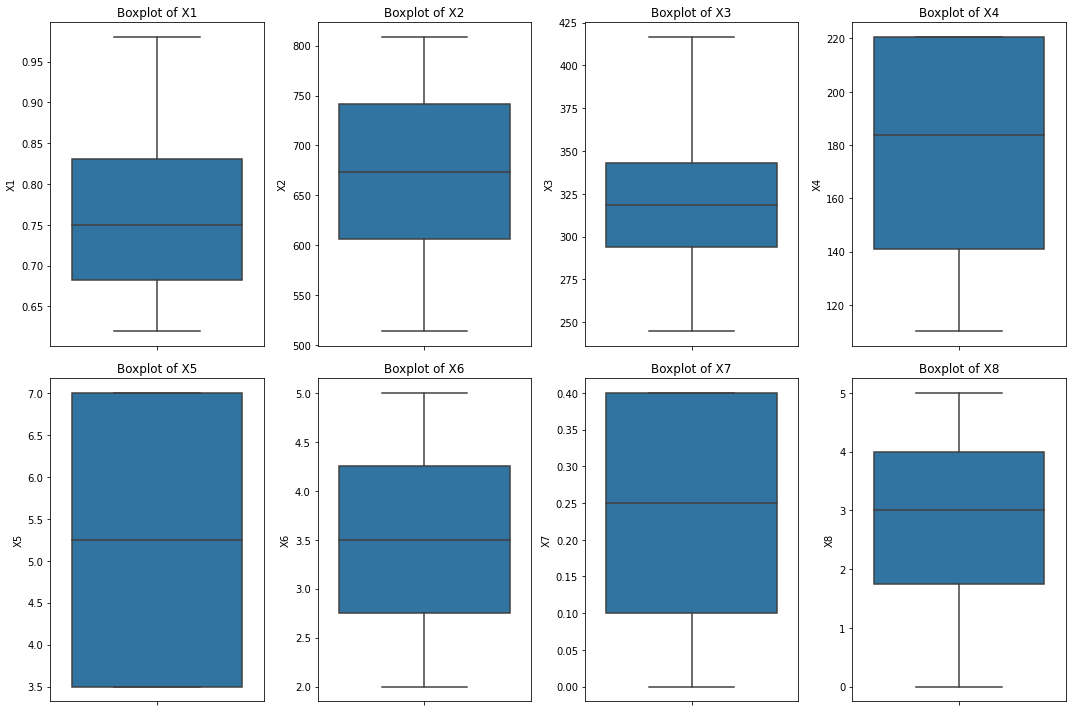

X1: 0 outliers
X2: 0 outliers
X3: 0 outliers
X4: 0 outliers
X5: 0 outliers
X6: 0 outliers
X7: 0 outliers
X8: 0 outliers


In [7]:
# Plot boxplots for each feature
features = df.columns[:-2]  # Exclude target variables Y1 and Y2

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Identify outliers using IQR
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))]
    print(f"{feature}: {len(outliers)} outliers")

# OBSERVATION- NO OUTLIERS PRESENT

# MANUAL IMPLEMENTATION OF LINEAR REGRESSION

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (Y1 for Heating Load)
X = df.iloc[:, :-2].values  # All feature columns except Y1 and Y2
y = df['Y1'].values         # Target variable (Heating Load)

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for numerical stability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a bias term (intercept) to the feature matrix (train set)
X_train_scaled_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]

# Compute the weights using the Normal Equation: theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X_train_scaled_bias.T @ X_train_scaled_bias) @ X_train_scaled_bias.T @ y_train

# Apply the same scaling to the test set
X_test_scaled = scaler.transform(X_test)  # Apply same scaling to test set
X_test_scaled_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]  # Add bias column

# Predict on the training and testing data (scaled)
y_train_pred_scratch = X_train_scaled_bias @ theta
y_test_pred_scratch = X_test_scaled_bias @ theta

# Calculate performance metrics
train_mse_scratch = mean_squared_error(y_train, y_train_pred_scratch)
test_mse_scratch = mean_squared_error(y_test, y_test_pred_scratch)
train_r2_scratch = r2_score(y_train, y_train_pred_scratch)
test_r2_scratch = r2_score(y_test, y_test_pred_scratch)
train_rmse_scratch = np.sqrt(train_mse_scratch)
test_rmse_scratch = np.sqrt(test_mse_scratch)

# Print the results
print(f"Manual Linear Regression - Train R2: {train_r2_scratch:.4f}, Test R2: {test_r2_scratch:.4f}")
print(f"Manual Linear Regression - Train MSE: {train_mse_scratch:.4f}, Test MSE: {test_mse_scratch:.4f}")
print(f"Manual Linear Regression - Train RMSE: {train_rmse_scratch:.4f}, Test RMSE: {test_rmse_scratch:.4f}")

Manual Linear Regression - Train R2: 0.9141, Test R2: 0.9080
Manual Linear Regression - Train MSE: 8.6717, Test MSE: 9.5922
Manual Linear Regression - Train RMSE: 2.9448, Test RMSE: 3.0971


# IMPLEMENTATION OF LINEAR REGRESSION USING SKLEARN

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# MSE
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

print(f"Linear Regression (sklearn) - Train MSE: {train_mse_lr}, Test MSE: {test_mse_lr}")

Linear Regression (sklearn) - Train MSE: 8.459281797088073, Test MSE: 9.266071733237911


# IMPLEMENTATION OF LASSO AND RIDGE REGRESSION

In [10]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
train_mse_ridge = mean_squared_error(y_train, ridge_model.predict(X_train))
test_mse_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # Adjust alpha for sparsity
lasso_model.fit(X_train, y_train)
train_mse_lasso = mean_squared_error(y_train, lasso_model.predict(X_train))
test_mse_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))

print(f"Ridge Regression - Train MSE: {train_mse_ridge}, Test MSE: {test_mse_ridge}")
print(f"Lasso Regression - Train MSE: {train_mse_lasso}, Test MSE: {test_mse_lasso}")

Ridge Regression - Train MSE: 8.778762683624322, Test MSE: 9.65345786991928
Lasso Regression - Train MSE: 8.781413268863075, Test MSE: 9.74291689173785


# RESULTS

In [11]:
from sklearn.metrics import r2_score

# Define a function to calculate metrics
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

# Evaluate manual implementation
r2_scratch, mse_scratch, rmse_scratch = evaluate_model(y_test, y_test_pred_scratch)

# Evaluate sklearn linear regression
r2_lr, mse_lr, rmse_lr = evaluate_model(y_test, y_test_pred_lr)

# Evaluate sklearn ridge regression
r2_ridge, mse_ridge, rmse_ridge = evaluate_model(y_test, ridge_model.predict(X_test))

# Evaluate sklearn lasso regression
r2_lasso, mse_lasso, rmse_lasso = evaluate_model(y_test, lasso_model.predict(X_test))

# Print the results
print("Manual Linear Regression:")
print(f"R2: {r2_scratch:.4f}, MSE: {mse_scratch:.4f}, RMSE: {rmse_scratch:.4f}")

print("\nSklearn Linear Regression:")
print(f"R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}")

print("\nSklearn Ridge Regression:")
print(f"R2: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}, RMSE: {rmse_ridge:.4f}")

print("\nSklearn Lasso Regression:")
print(f"R2: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}, RMSE: {rmse_lasso:.4f}")


Manual Linear Regression:
R2: 0.9080, MSE: 9.5922, RMSE: 3.0971

Sklearn Linear Regression:
R2: 0.9111, MSE: 9.2661, RMSE: 3.0440

Sklearn Ridge Regression:
R2: 0.9074, MSE: 9.6535, RMSE: 3.1070

Sklearn Lasso Regression:
R2: 0.9065, MSE: 9.7429, RMSE: 3.1214


# PLOTS FOR COMPARISON

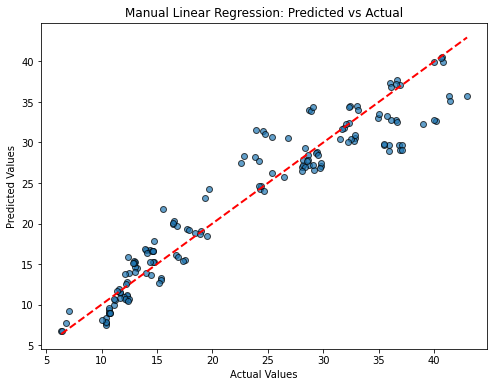

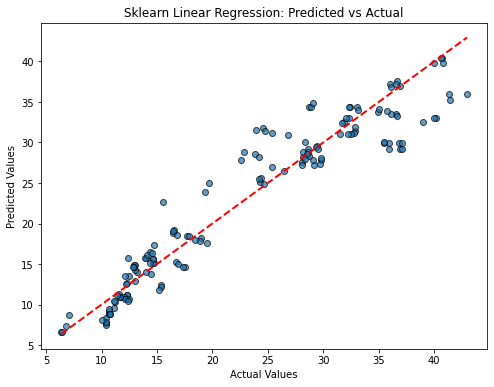

In [12]:
# Plot function
def plot_predictions(y_actual, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

# Plot for manual implementation
plot_predictions(y_test, y_test_pred_scratch, "Manual Linear Regression: Predicted vs Actual")

# Plot for sklearn linear regression
plot_predictions(y_test, y_test_pred_lr, "Sklearn Linear Regression: Predicted vs Actual")


# FINDING CORRELATIONS FOR HEATING LOAD

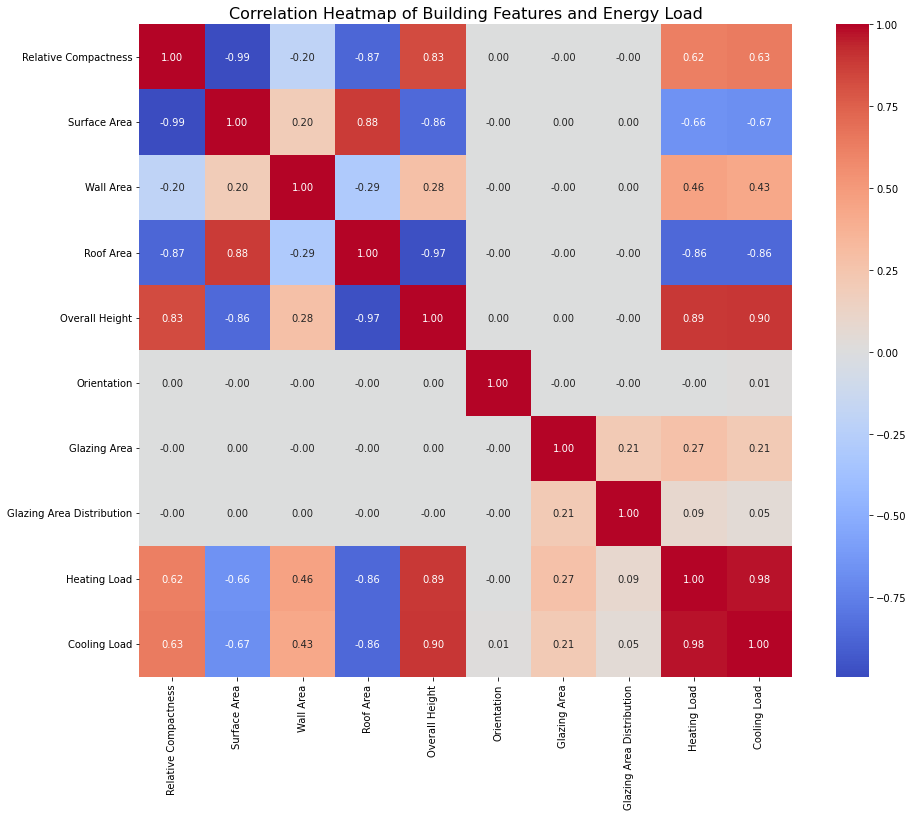

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Actual column names
actual_column_names = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
}

# Rename the columns in the dataframe to the actual names
df = df.rename(columns=actual_column_names)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap of Building Features and Energy Load', fontsize=16)
plt.show()

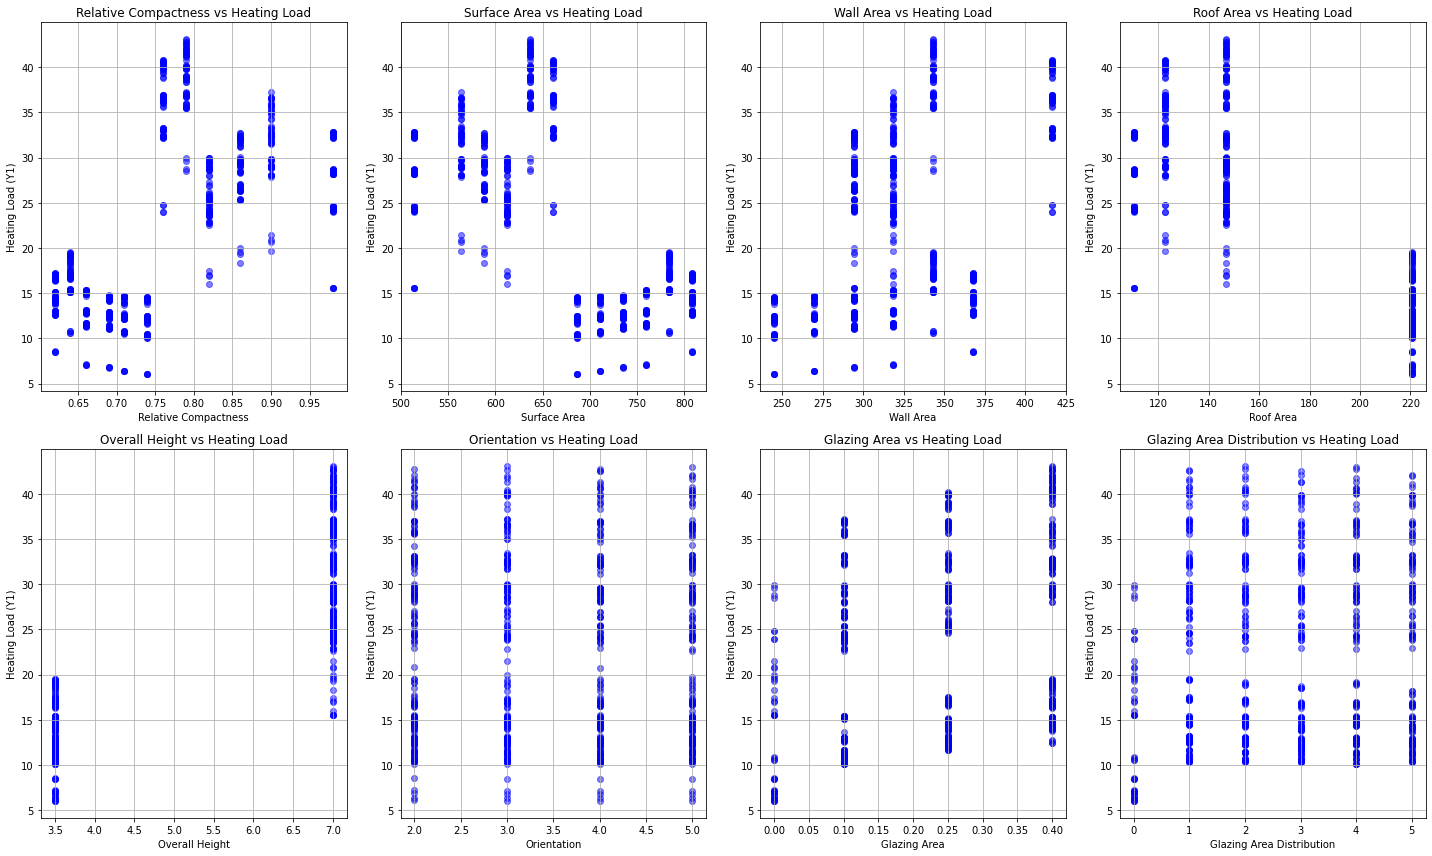

In [14]:
import matplotlib.pyplot as plt

# Define the independent variables (features)
independent_vars = ['Relative Compactness', 'Surface Area', 'Wall Area', 
                     'Roof Area', 'Overall Height', 'Orientation', 
                     'Glazing Area', 'Glazing Area Distribution']

# Set up the plot grid (2 rows, 4 columns for 8 features)
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each independent variable and plot against Heating Load (Y1)
for i, feature in enumerate(independent_vars):
    axes[i].scatter(df[feature], df['Heating Load'], color='b', alpha=0.5)
    axes[i].set_title(f'{feature} vs Heating Load')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Heating Load (Y1)')
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# IMPROVEMENT SUGGESTIONS FROM PLOTS

OBSERVATION FROM SCATTER PLOTS

1. From the scatter plot, Heating Load and Relative Compactness are strongly negatively correlated-as the relative compactness increases, the heating load decreases much. This indeed means that among buildings, the ones that are more compact in design tend to lose less amount of heat. For all buildings, increase relative compactness by assuming compact shapes, like cubes or spheres, that can reduce surface area exposed to the outside environment to decrease heating demands

2. The Surface Area and Heating Load are directly proportional to each other: the greater the surface area, the higher the heating because more heat is lost through the external surfaces. This emphasizes the need for a well-thought-out shape design in buildings to control surface area.Reduction of surface area, optimization of building design to decrease superfluous external exposures. Where this is impossible, large areas should employ good insulation material to avoid heat loss.

3. We have a moderate positive relationship between Wall Area and Heating Load. A greater the wall area, the more a house is exposed to the external conditions; hence, greater heating requirements. This effect is not as pronounced as it was for surface area and roof area. Thermal insulation materials that are efficient can be recommended for buildings that have large wall areas to reduce heat transfer. The design should also focus on reducing unnecessary wall extensions or projections.

4. The scatter plot indicates a strong positive relation between Roof Area and Heating Load, with the roof being one of the major sources of heat loss in buildings. Increased areas of roofs raise significantly the heating needs in cold climates. Whenever possible, reduce the roof area or consider special roofing options, such as super-insulated or green roofs, that have increased thermal resistance. Pay attention to its proper sealing and insulation, trying to limit heat losses in this crucial component as much as possible.

5. From the scatter plot, there is a positive trend between Overall Height and Heating Load. The taller the building, the more heating it needs due to increased vertical exposure and heat stratification, which can be especially evident in multi-story structures. The height of the building should be optimized with a balance between functionality and energy efficiency. In taller buildings, emphasis should be given to increased insulation at roof and floor levels to reduce vertical heat transfer.

6. No significant correlation is obtained between Orientation and Heating Load. This shows that the heating loads are fairly uniform across different orientations. However, this may change for specific climate conditions or passive solar heating considerations. Orientation has less impact on heating load, but south-facing walls can be used for passive solar heating in cold climates. Design the building layout with the region in mind.

7. The Glazing Area and Heating Load are mildly positively correlated. A larger glazing area is associated with more heat loss since the window usually has lower insulation compared with a wall. However, glazing does provide natural light, so some trade-off must be made. Glazing Area Reduction to reduce heating needs but with adequate daylighting. Energy-efficient glazing material, such as double-glazed or Low-E glass, will improve thermal performance without affecting natural lighting.

8. The scatter plot does not show any significant dependency of Glazing Area Distribution and Heating Load. This would probably mean that while the glazing area, in general, impacts heating requirements, its distribution over the building does not tell much. Glazing distribution should be done in such a way that it prevents local heat loss or excessive heat gain. The design shall focus on window placement for natural lighting and passive heating.